In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Function to produce points symmetrically around center
def symmetric_roi_pnts(center, width, step_size):
    lower = np.flipud(np.arange(center-step_size, center-width/2 - step_size, -step_size))
    upper = np.arange(center, center+width/2 + step_size, step_size)
    
    return np.concatenate((lower, upper))

# Function to replace redundant points in scan_pnts with those of roi_pnts
def insert_roi_pnts(scan_pnts, roi_pnts):
    # Split scan_pnts in to a lower/upper parts without including points in roi_pnts
    [scan_pnts_lower, scan_pnts_upper] = [scan_pnts[scan_pnts <= min(roi_pnts)], scan_pnts[scan_pnts >= max(roi_pnts)]]
    
    # Return concate the array with roi_points in between lower/upper part of scan_pnts
    return np.concatenate((scan_pnts_lower, roi_pnts, scan_pnts_upper))

def generate_scan_pnts(start_value, stop_value, step_size, roi):
    scan_pnts = np.arange(start_value, stop_value+step_size, step_size)
    
    for row in roi:
        roi_pnts = symmetric_roi_pnts(row[0], row[1], row[2])
        scan_pnts = insert_roi_pnts(scan_pnts, roi_pnts)
    
    # Remove duplicate points
    scan_pnts = np.unique(scan_pnts)
    
    # Sort low to high
    scan_pnts = np.sort(scan_pnts)
    
    return scan_pnts

In [9]:
# Regions of interest [center, width, fine_step]
roi = np.array([[1610.75, 1.5+1.7, 0.025],
                [1597.33, 5.76, 0.025]])

out = generate_scan_pnts(1612.95, 1588.7, -0.1, roi)

np.savetxt('custom_scan.csv', out, delimiter=',', fmt='%10.4f')

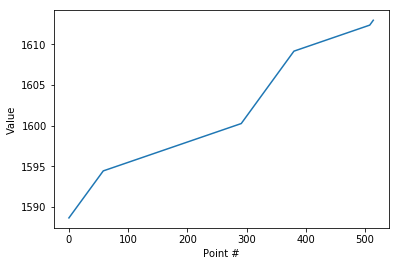

In [13]:
plt.plot(out)
plt.xlabel('Point #')
plt.ylabel('Value')
plt.show()